In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-09-17 06:56:35--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2022-09-17 06:56:35 (15.2 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [ ]:
!wget https://myrepublica.nagariknetwork.com/uploads/media/1653638352_balen-1200x560_20220527154243.jpg -O balen.png

--2022-09-17 06:56:35--  https://myrepublica.nagariknetwork.com/uploads/media/1653638352_balen-1200x560_20220527154243.jpg
Resolving myrepublica.nagariknetwork.com (myrepublica.nagariknetwork.com)... 45.115.218.170
Connecting to myrepublica.nagariknetwork.com (myrepublica.nagariknetwork.com)|45.115.218.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408724 (399K) [image/jpeg]
Saving to: ‘balen.png’

balen.png           100%[===================>] 399.14K   429KB/s    in 0.9s    

2022-09-17 06:56:38 (429 KB/s) - ‘balen.png’ saved [408724/408724]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread("balen.png")
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

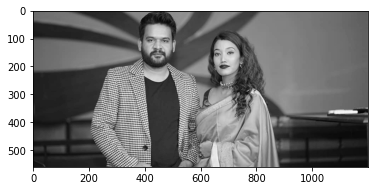

In [ ]:
plt.imshow(gray_image,cmap='gray')

# Theory

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Here we will work with face detection. Initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then we need to extract features from it. For this, Haar features shown in the below image are used. They are just like our convolutional kernel. Each feature is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.

<img src = "https://docs.opencv.org/3.4/haar_features.jpg">

Let's Initialize cv2 CascadeClassifier object.

In [ ]:
face_cascading = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

Find the faces coordinates using `face_cascading` object `detectMultiScale()` method

In [ ]:
faces = face_cascading.detectMultiScale(gray_image)

In [ ]:
print('No. of Faces detected: ',len(faces))

No. of Faces detected:  2


In [ ]:
faces

array([[383,  59, 132, 132],
       [622, 105, 128, 128]], dtype=int32)

Plot rectangle of detected faces


    faces[0] is x,y,w,h


```python
import cv2
cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),5)  
```

In [ ]:

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    cv2.rectangle(gray_image,(x,y),(x+w,y+h),(255,0,0),5)

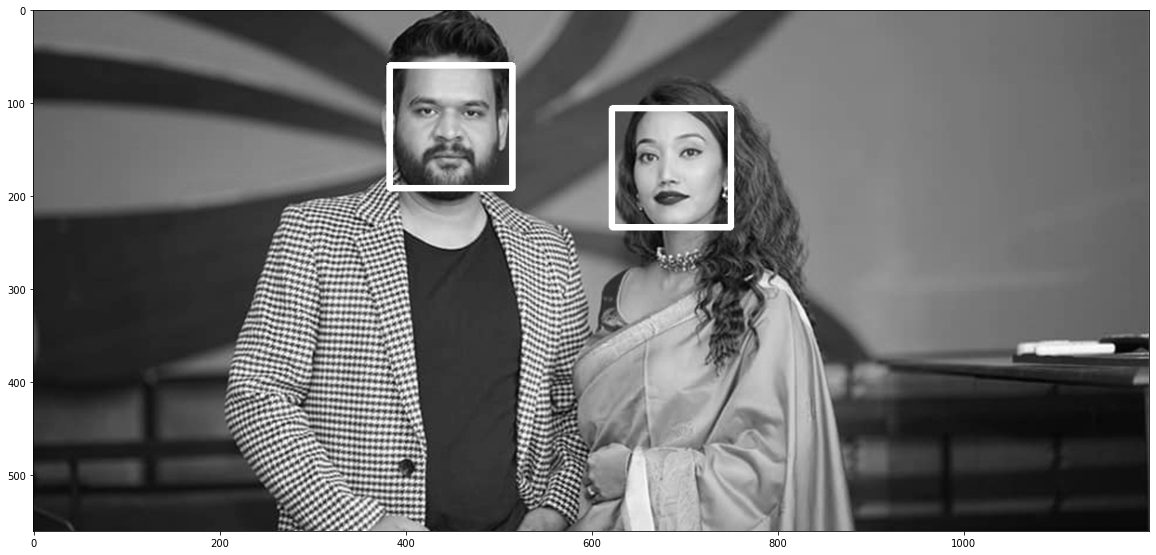

In [ ]:
# display the result
plt.figure(figsize=(20,10))
plt.imshow(gray_image, cmap = 'gray')